In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [8]:
df = pd.read_csv("heart_disease.csv")
df = df.sample(frac=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 245237 to 190090
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64


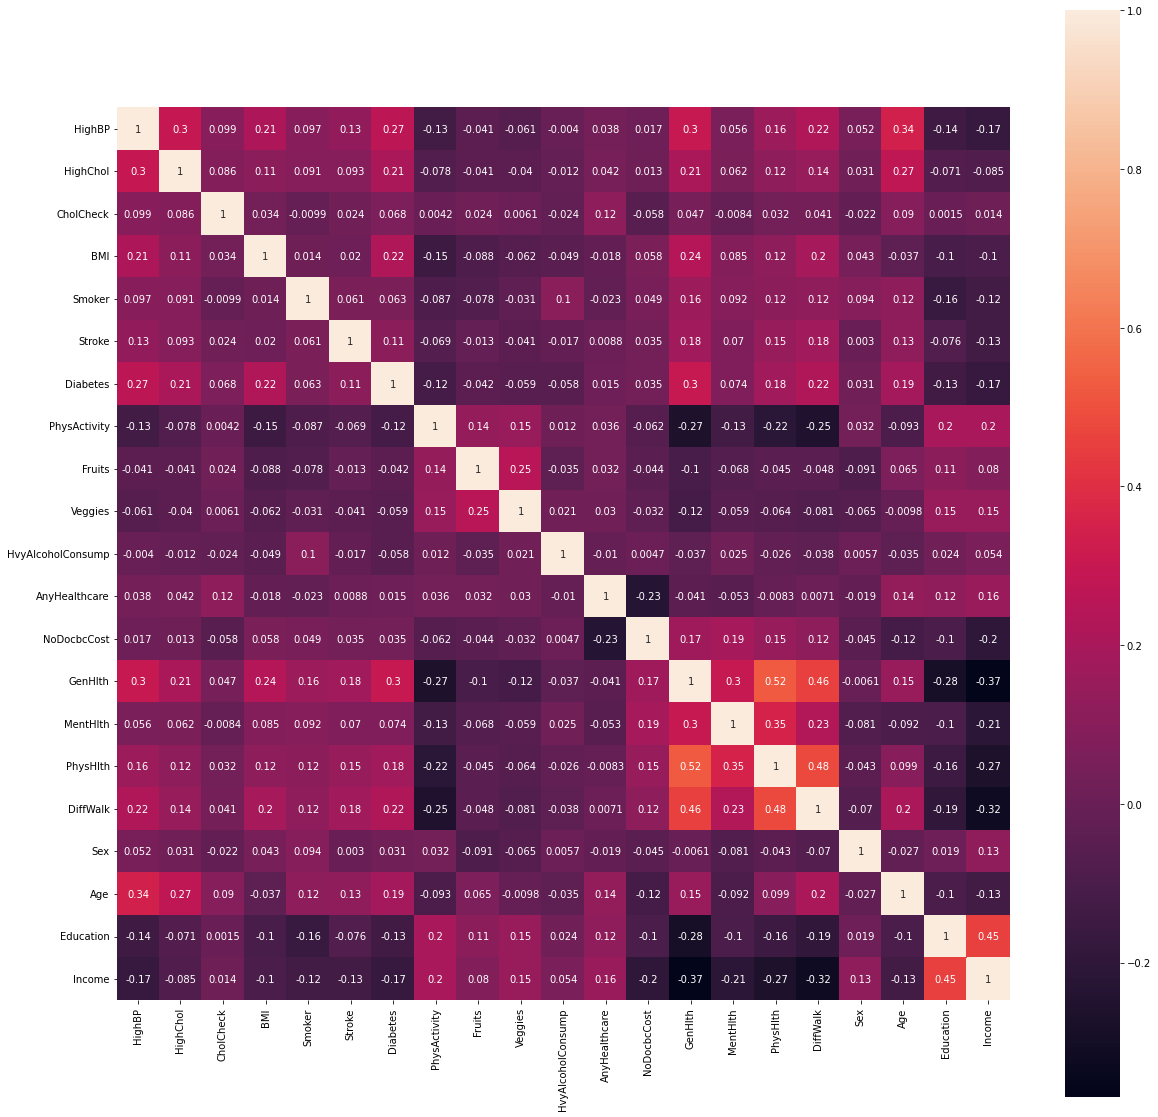

In [9]:
features = ["HighBP" , "HighChol" , "CholCheck" , "BMI" , "Smoker" , "Stroke" , "Diabetes" , "PhysActivity" , "Fruits" , "Veggies" 
            , "HvyAlcoholConsump" , "AnyHealthcare" , "NoDocbcCost" , "GenHlth" , "MentHlth" , "PhysHlth" , "DiffWalk" , "Sex" 
            , "Age" , "Education" , "Income"]
plt.figure(figsize=(20,20))      
sns.heatmap(df[features].corr(), annot=True, square=True)
plt.show()

In [33]:
X = df.drop('HeartDiseaseorAttack' , axis = 1)

y = df['HeartDiseaseorAttack']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

# Regresión Logistica

In [30]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()

In [35]:
regr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
regr_pred = regr.predict(X_test)
print(classification_report(regr_pred, y_test))
regr.score(X_test, y_test)

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     49695
         1.0       0.12      0.53      0.19      1041

    accuracy                           0.91     50736
   macro avg       0.55      0.72      0.57     50736
weighted avg       0.97      0.91      0.94     50736



0.9075804162724692

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [15]:
model.fit(X_train , y_train)

RandomForestClassifier()

In [16]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))
model.score(X_test , y_test)

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     49553
         1.0       0.11      0.45      0.18      1183

    accuracy                           0.90     50736
   macro avg       0.55      0.68      0.56     50736
weighted avg       0.97      0.90      0.93     50736



0.9033822138126774

# K-NN

In [17]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
knn_pred = knn.predict(X_test)
print(classification_report(knn_pred , y_test))
knn.score(X_test , y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     48349
         1.0       0.14      0.29      0.19      2387

    accuracy                           0.89     50736
   macro avg       0.55      0.60      0.56     50736
weighted avg       0.92      0.89      0.90     50736



0.885643330179754

# SVC (Por cuestiones de recursos, se excluyo este modelo)

In [20]:
''' from sklearn.svm import SVC
svc = SVC() '''

' from sklearn.svm import SVC\nsvc = SVC() '

In [21]:
''' svc.fit(X_train, y_train) '''

' svc.fit(X_train, y_train) '

In [22]:
''' svc_pred = svc.predict(X_test)
print(classification_report(svc_pred, y_test))
svc.score(X_test, y_test) '''

' svc_pred = svc.predict(X_test)\nprint(classification_report(svc_pred, y_test))\nsvc.score(X_test, y_test) '

# Comparacion de datos predecidos con los reales

In [23]:
print('Accuraccy for Logisitic Regression method.....: ',regr.score(X_test,y_test))
print('Accuraccy for Random Forest method............: ',model.score(X_test,y_test))
print('Accuraccy for K nearsort neighbors method.....: ',knn.score(X_test,y_test))

Accuraccy for Logisitic Regression method.....:  0.9073833175654368
Accuraccy for Random Forest method............:  0.9033822138126774
Accuraccy for K nearsort neighbors method.....:  0.885643330179754


In [25]:
regr_pred.shape

(50736,)

In [26]:
y_test.shape

(50736,)

In [27]:
resultados = pd.DataFrame({'Reales':y_test, 'Predicciones':regr_pred})
resultados

,Reales,Predicciones
30086,0.0,0.0
184771,0.0,0.0
105303,0.0,0.0
79793,0.0,0.0
65870,0.0,0.0
...,...,...
102594,0.0,0.0
90525,0.0,0.0
218363,0.0,0.0
105917,0.0,0.0
